## Build Linear Regression model to predict the math_score for students

## Import data and required packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn modules for preprocessing, model selection, metrics, and modeling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

import warnings
warnings.filterwarnings("ignore")  # Optional: to keep output clean

### Load the data as pandas dataframe

In [3]:
df = pd.read_csv('/content/drive/MyDrive/AI_projects/ml project/stud.csv')

In [4]:
df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


Prepare Features (X) and Target (Y)

In [5]:
# Define Feature variables (X) by dropping the target column
x = df.drop(columns=['math_score'], axis=1)

In [6]:
# Define Target variable (y)
y = df['math_score']

In [7]:
# Inspect the categories in our categorical columns
print("Categories in 'gender' variable:      ", df['gender'].unique())
print("Categories in 'race_ethnicity' variable:        ", df['race_ethnicity'].unique())
print("Categories in 'parental_level_of_education':    ", df['parental_level_of_education'].unique())
print("Categories in 'lunch' variable:       ", df['lunch'].unique())
print("Categories in 'test_preparation_course':      ", df['test_preparation_course'].unique())

Categories in 'gender' variable:       ['female' 'male']
Categories in 'race_ethnicity' variable:         ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental_level_of_education':     ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:        ['standard' 'free/reduced']
Categories in 'test_preparation_course':       ['none' 'completed']


## Data Preprocessing (Transformation) :

### Machine learning models require numerical input. We must convert text categories to numbers and scale numerical values.

In [8]:
# Separate numerical and categorical columns
num_features = x.select_dtypes(exclude='object').columns
cat_features = x.select_dtypes(include='object').columns

# Create transformers
# 1. StandardScaler: Normalizes numerical data (e.g., reading score, writing score)
numeric_transformer = StandardScaler()

# 2. OneHotEncoder: Converts categorical text data into binary numbers (0s and 1s)
oh_transformer = OneHotEncoder()

# Create a ColumnTransformer to apply specific transformations to specific columns
preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features),
    ]
)

# Apply transformations to the features (X)
x = preprocessor.fit_transform(x)

print(f"Processed Feature Shape: {x.shape}")

Processed Feature Shape: (1000, 19)


# Split Data into Train and Test Sets :


*   Train set: Used to teach the model patterns.
*   Test set: Used to evaluate how well the model performs on data it has never seen before.



In [9]:
# Split the data: 80% for training, 20% for testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print(f"X Train shape: {x_train.shape}")
print(f"X Test shape: {x_test.shape}")

X Train shape: (800, 19)
X Test shape: (200, 19)


#  Model Training and Evaluation

In [10]:
# Initialize the Linear Regression Model
lin_model = LinearRegression(fit_intercept=True)

# Train the model using the training data
lin_model.fit(x_train, y_train)

# Make predictions on the test data
y_pred = lin_model.predict(x_test)

# Define a function to evaluate metrics
def evaluate_model(true, predicted):
    mse = mean_squared_error(true, predicted)
    r2_square = r2_score(true, predicted)
    return mse, r2_square

# Evaluate the model
mse, r2 = evaluate_model(y_test, y_pred)

print("Model Performance:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R2 Score (Accuracy): {r2*100:.2f}%")

Model Performance:
Mean Squared Error: 29.10
R2 Score (Accuracy): 88.04%


# Visualization of Results

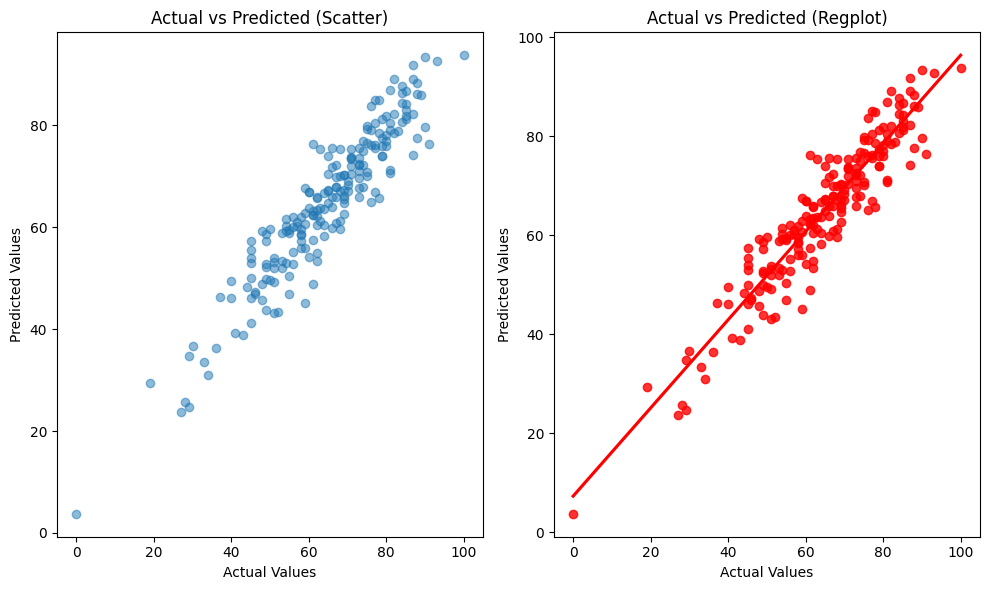

In [11]:
# Set plot size
plt.figure(figsize=(10, 6))

# 1. Scatter Plot: Actual vs Predicted
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted (Scatter)')

# 2. Regression Plot: Shows the trend line
plt.subplot(1, 2, 2)
sns.regplot(x=y_test, y=y_pred, ci=None, color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted (Regplot)')

plt.tight_layout()
plt.show()

# Explanation the result of visualization :


*   We create two plots side-by-side to visualize how close the predictions are to the actual values.
*   Scatter plot: If the model were perfect, all points would lie on a straight diagonal line.

*   Regplot: Adds a trend line (red) to show the general direction of the predictions.





#  Compare Actual vs Predicted Values

In [12]:
# Create a DataFrame to compare Actual, Predicted, and the Difference
pred_df = pd.DataFrame({
    'Actual Value': y_test,
    'Predicted Value': y_pred,
    'Difference': y_test - y_pred
})

# Display the first 10 rows of the comparison
print(pred_df.head(10))

     Actual Value  Predicted Value  Difference
521            91        76.387970   14.612030
737            53        58.885970   -5.885970
740            80        76.990265    3.009735
660            74        76.851804   -2.851804
411            84        87.627378   -3.627378
678            81        79.014024    1.985976
626            69        64.654609    4.345391
513            54        53.007919    0.992081
859            87        74.184710   12.815290
136            51        49.213538    1.786462


Explanation :



*   This creates a readable table comparing the actual test scores with what the model predicted.
*   The Difference column shows the error. A negative difference means the model overestimated; a positive difference means it underestimated.

